In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [3]:
dataset = pd.read_csv('/content/salary.csv')

In [4]:
print(dataset.shape)
print(dataset.head(10))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
6   38              6             0              40  <=50K
7   74             16             0              20   >50K
8   68              9             0              40  <=50K
9   41             10             0              60   >50K


In [5]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K':0 , '>50K':1 }).astype(int)
print(dataset['income'])
print(dataset.head(5))

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64
   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [6]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [7]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Error Rate')

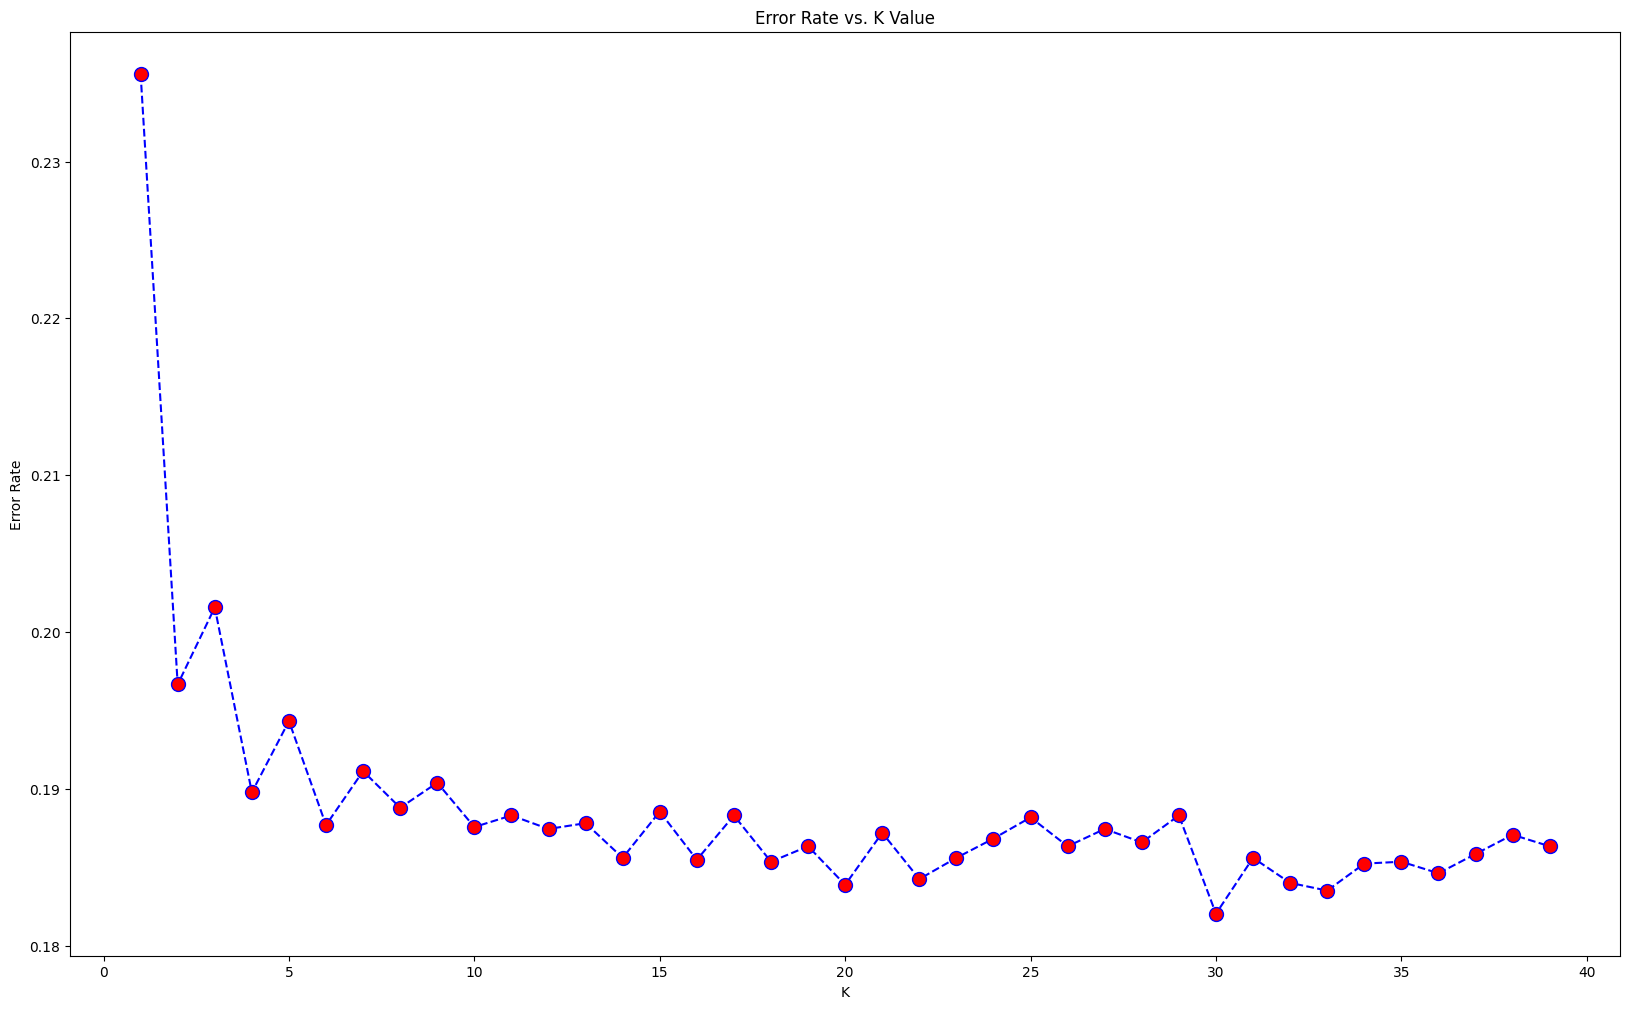

In [34]:
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(20,12))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:

model = KNeighborsClassifier(n_neighbors=30) # can also add in braket (metric = 'minkowski', p = 2)
# minkowski means uuclidean distance when p=2 which is used by defauls that's why i didn't add it
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [39]:
age = int(input("Enter Employee's age: "))
edu = int(input("Enter Employee's education: "))
c_gain = int(input("Enter Employee's capital gain: "))
w_hour = int(input("Enter Employee's work per hour: "))

new_emp = [[age,edu,c_gain,w_hour]]
prediction = model.predict(sc.transform(new_emp))

print(prediction)

if prediction == 1:
  print("Employee might get Salary above 50K")
else:
  print("Employee might not get Salary above 50K")


Enter Employee's age: 50
Enter Employee's education: 9
Enter Employee's capital gain: 0
Enter Employee's work per hour: 70
[0]
Employee might not get Salary above 50K


In [36]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5875  318]
 [1164  784]]
Accuracy of the Model: 81.79584817589976%
